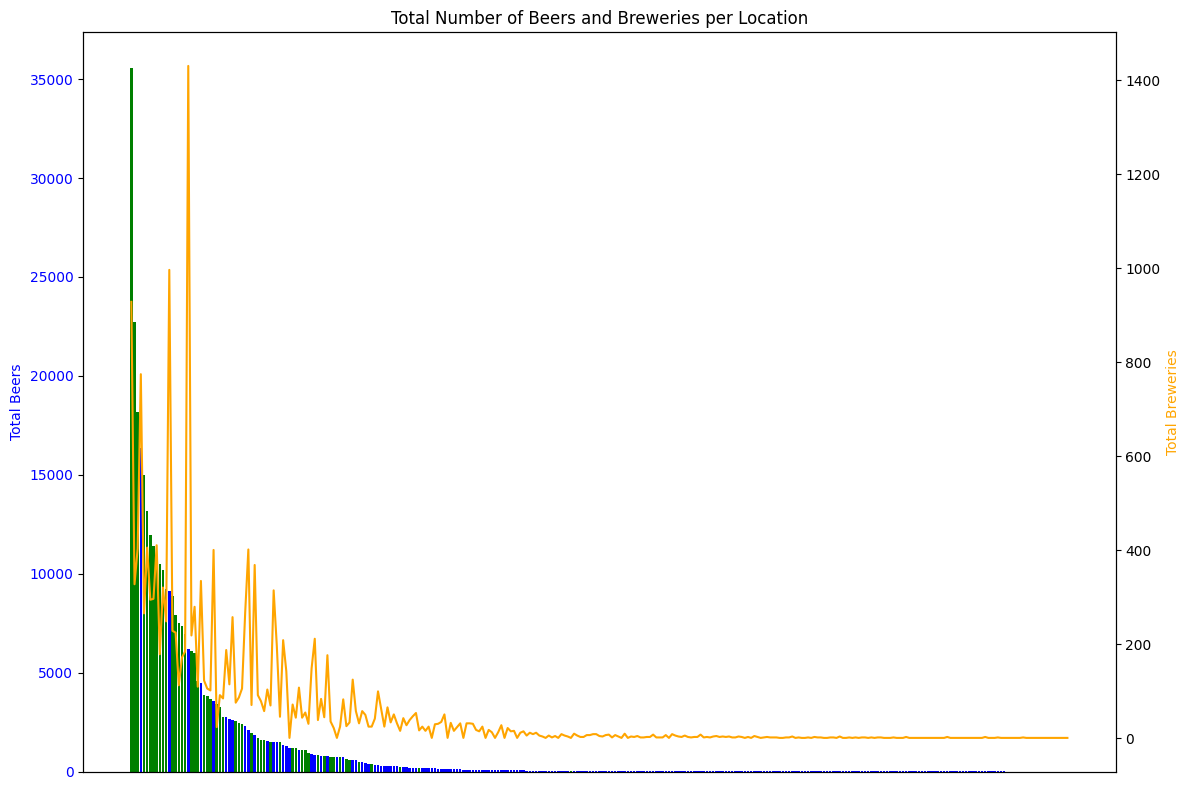

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math





#number of beers per location
breweries = pd.read_csv('minimizedData/BA_breweries_small.csv')

#Calculating the number of beers and breweries produced by each location
country_stats = breweries.groupby('location').agg(
    total_breweries=('id', 'nunique'),
    total_beers=('nbr_beers', 'sum')
).reset_index()




# Plotting the total number of beers and breweries for each location

country_stats = country_stats.sort_values(by='total_beers', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_colors = ['green' if country.startswith('United States,') else 'blue' for country in country_stats['location']]

# Bar plot for total beers
ax1.bar(country_stats['location'], country_stats['total_beers'], color=bar_colors, label='Total Beers')
#ax1.set_xlabel('Country')
ax1.set_ylabel('Total Beers', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks([])

#Overlay line plot for total breweries
ax2 = ax1.twinx()
ax2.plot(country_stats['location'], country_stats['total_breweries'], color='orange', label='Total Breweries')
ax2.set_ylabel('Total Breweries', color='orange')
plt.xticks([])

plt.title('Total Number of Beers and Breweries per Location')
fig.tight_layout()
plt.savefig("modules/1.png")
